In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Filename: NGC4192_DESI_gi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (512, 512, 2)   float32   


SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  512 / length of data axis 1                          NAXIS2  =                  512 / length of data axis 2                          NAXIS3  =                    2 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H SURVEY  = 'LegacySurvey'                                                        VERSION = 'DR10    '                                                            IMAGETYP= 'IMAGE   '           / None                                           BANDS   = 'gi      '                    

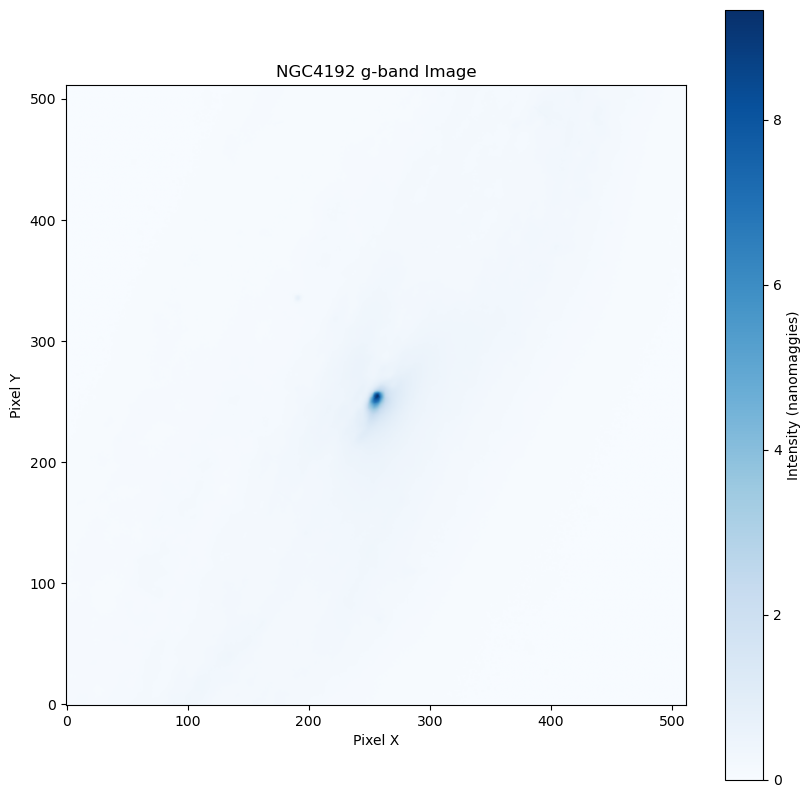

In [2]:
# Load the FITS file (update the filename as needed)
filename = "NGC4192_DESI_gi.fits"
hdul = fits.open(filename)

# Display the structure of the FITS file
hdul.info()

# Assuming the image data is in the primary HDU (index 0)
data = hdul[0].data

# Optionally, print header information to see details about the observation
header = hdul[0].header
print(header)

# Close the FITS file after loading data (optional but recommended)
hdul.close()

# Plot the data using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(data[0], cmap='Blues', origin='lower')
plt.colorbar(label='Intensity (nanomaggies)')
plt.title("NGC4192 g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

In [3]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  512 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
NAXIS3  =                    2 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
SURVEY  = 'LegacySurvey'                                                        
VERSION = 'DR10    '                                                            
IMAGETYP= 'IMAGE   '           / None                                           
BANDS   = 'gi      '        

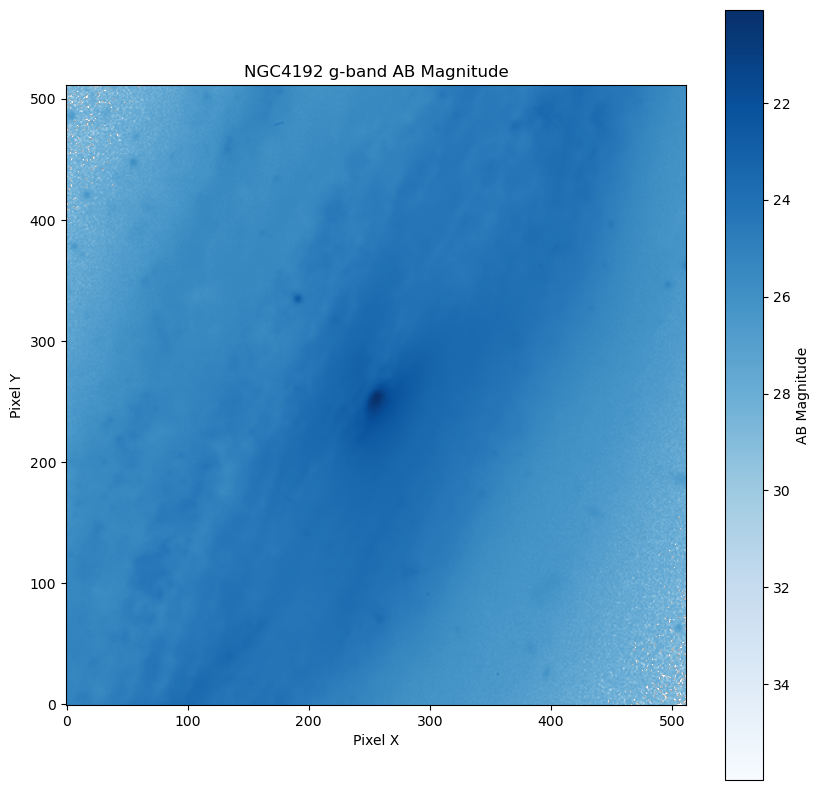

In [4]:
# Since the data shape is (2, 512, 512), extract the first slice for the g-band
g_band = data[0]

# Convert the flux (in nanomaggies) to AB magnitudes using:
# m_AB = 22.5 - 2.5*log10(flux)
# Create a mask to only process positive flux values
mask = g_band > 0
m_ab = np.full(g_band.shape, np.nan)  # Initialize with NaNs for non-positive pixels
m_ab[mask] = 22.5 - 2.5 * np.log10(g_band[mask])

# Visualize the AB magnitude image
plt.figure(figsize=(10, 10))
plt.imshow(m_ab, cmap='Blues_r', origin='lower')
cbar = plt.colorbar(label='AB Magnitude')
cbar.ax.invert_yaxis()
plt.title("NGC4192 g-band AB Magnitude")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

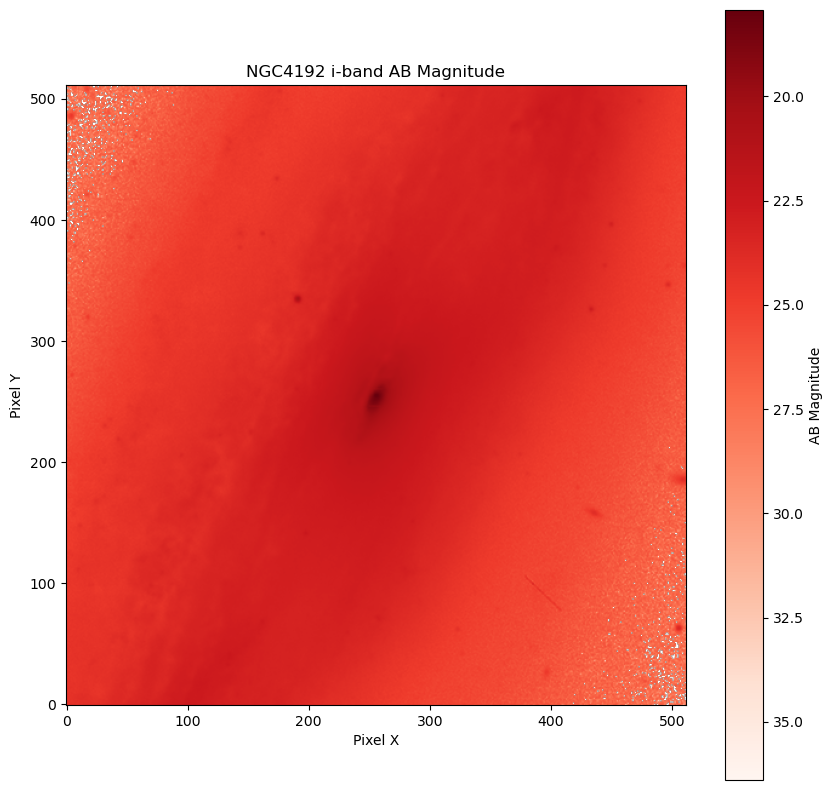

In [5]:
# Extract the second slice (i-band)
i_band = data[1]

# Convert flux to AB magnitudes
mask_i = i_band > 0
m_ab_i = np.full(i_band.shape, np.nan)
m_ab_i[mask_i] = 22.5 - 2.5 * np.log10(i_band[mask_i])

# Plot the i-band in red
plt.figure(figsize=(10, 10))
plt.imshow(m_ab_i, cmap='Reds_r', origin='lower')
cbar = plt.colorbar(label='AB Magnitude')
cbar.ax.invert_yaxis()
plt.title("NGC4192 i-band AB Magnitude")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()


In [6]:
# Compute distance modulus for 17.6 Mpc
distance_mpc = 13.55
distance_pc = distance_mpc * 1e6
DM = 5 * np.log10(distance_pc / 10.0)

# Combine the valid g-band and i-band masks
mask_combined = mask & mask_i

# Compute absolute magnitude in i-band
M_i = m_ab_i - DM

# Compute g-i color
g_minus_i = m_ab - m_ab_i

# Estimate log(M_*)
log_mstar_individual = np.full(i_band.shape, np.nan)
log_mstar_individual[mask_combined] = 1.15 + 0.7 * g_minus_i[mask_combined] - 0.4 * M_i[mask_combined]

# Total stellar mass in solar masses
log_mstar_individual_total = np.nansum(10**log_mstar_individual[mask_combined])  # Sum over the valid pixels
print(f"Estimated total stellar mass in solar masses: {log_mstar_individual_total:.2e}, or log10({np.log10(log_mstar_individual_total):.2f})")

Estimated total stellar mass in solar masses: 2.25e+10, or log10(10.35)


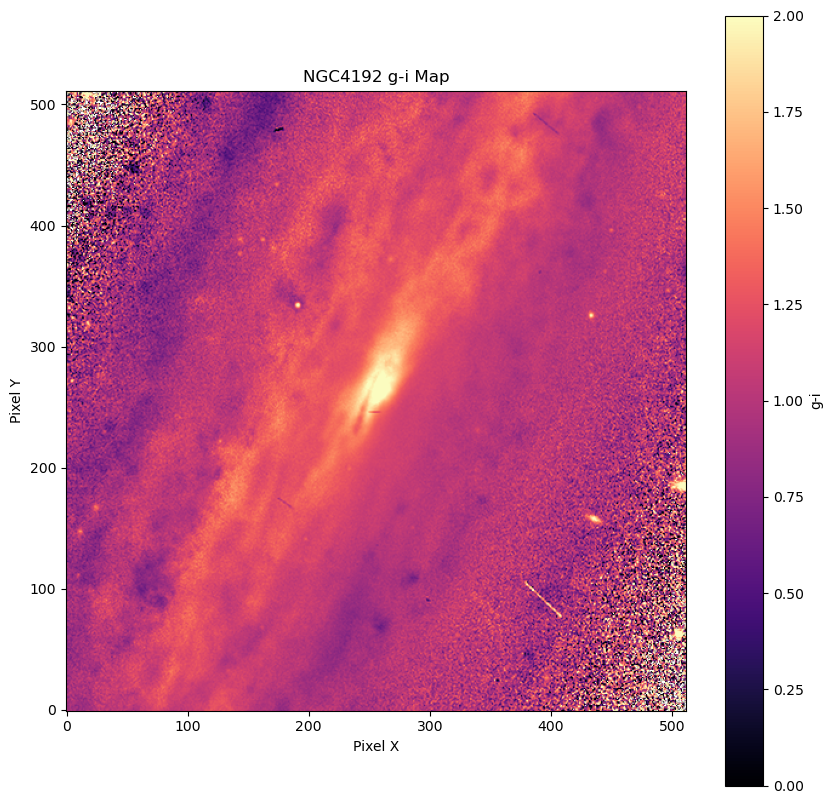

In [11]:
# Visualize the stellar mass distribution
plt.figure(figsize=(10, 10))
plt.imshow(g_minus_i, origin='lower', cmap='magma', vmin=0, vmax=2)
cbar = plt.colorbar(label='g-i')
plt.title("NGC4192 g-i Map")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

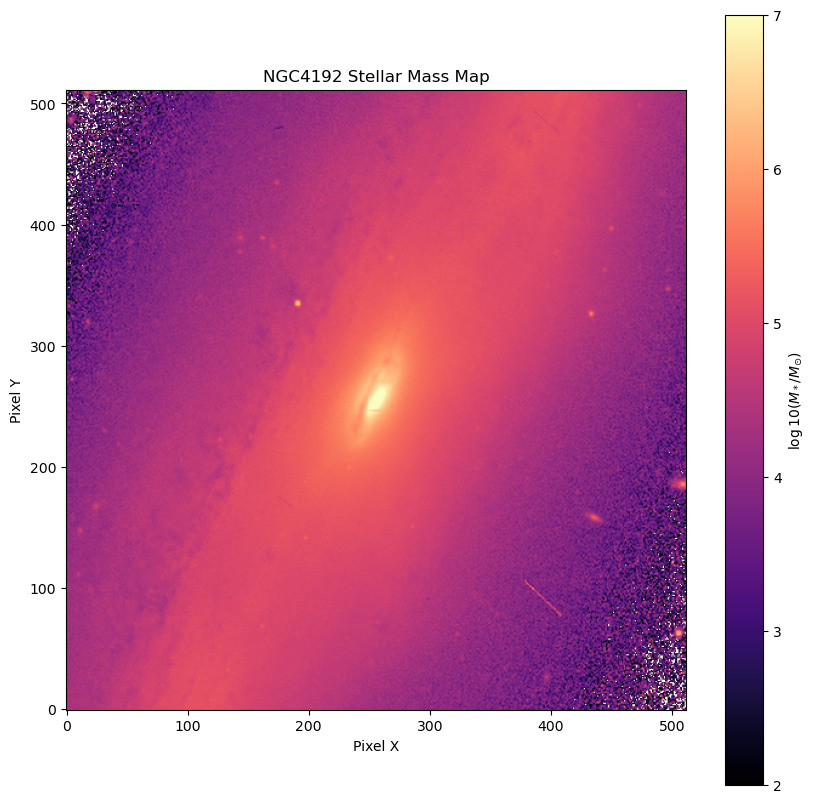

In [12]:
# Visualize the stellar mass distribution
plt.figure(figsize=(10, 10))
plt.imshow(log_mstar_individual, origin='lower', cmap='magma', vmin=2, vmax=7)
cbar = plt.colorbar(label=r'$\log{10}(M_*/M_{\odot})$')
plt.title("NGC4192 Stellar Mass Map")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

In [8]:
# Sum the g-band flux
sum_g_flux = np.nansum(g_band[mask])

# Sum the i-band flux
sum_i_flux = np.nansum(i_band[mask_i])

# Convert these summed fluxes to total AB magnitudes
m_ab_g_total = 22.5 - 2.5 * np.log10(sum_g_flux)
m_ab_i_total = 22.5 - 2.5 * np.log10(sum_i_flux)

# Compute distance modulus and total absolute magnitude in i-band
M_i_total = m_ab_i_total - DM

# Compute total g-i color
g_minus_i_total = m_ab_g_total - m_ab_i_total

# Estimate log(M_*), then convert to stellar mass
log_mstar_total = 1.15 + 0.7 * g_minus_i_total - 0.4 * M_i_total
mstar_total = 10**log_mstar_total

print(f"Alternative total stellar mass (integrated flux): {mstar_total:.2e}, or log10({np.log10(mstar_total):.2f}) solar masses")
print(f"Total g-band magnitude: {m_ab_g_total:.2f}")
print(f"Total i-band magnitude: {m_ab_i_total:.2f}")

Alternative total stellar mass (integrated flux): 1.76e+10, or log10(10.25) solar masses
Total g-band magnitude: 11.17
Total i-band magnitude: 9.99


In [9]:
def bin_image(image, bin_factor):
    # image is 512x512, bin_factor divides 512 (e.g. 1, 4, 16...)
    new_shape = (image.shape[0] // bin_factor, bin_factor,
                 image.shape[1] // bin_factor, bin_factor)
    return image.reshape(new_shape).sum(axis=(1, 3))

bin_factors = [1, 4, 16, 64, 256, 512]
mass_results = {}

for bf in bin_factors:
    # Sum fluxes in each bin for g- and i-band
    g_bin = bin_image(g_band, bf)
    i_bin = bin_image(i_band, bf)

    # Convert to magnitudes where flux > 0
    g_bin_m = np.full_like(g_bin, np.nan)
    i_bin_m = np.full_like(i_bin, np.nan)

    g_mask = g_bin > 0
    i_mask = i_bin > 0

    g_bin_m[g_mask] = 22.5 - 2.5 * np.log10(g_bin[g_mask])
    i_bin_m[i_mask] = 22.5 - 2.5 * np.log10(i_bin[i_mask])

    # Compute M_i (absolute), g-i color, and mass per bin
    M_i_binned = i_bin_m - DM
    g_minus_i_binned = g_bin_m - i_bin_m

    log_mstar_binned = np.full_like(i_bin_m, np.nan)
    valid_bins = g_mask & i_mask

    log_mstar_binned[valid_bins] = (1.15 +
                                    0.7 * g_minus_i_binned[valid_bins] -
                                    0.4 * M_i_binned[valid_bins])

    # Total stellar mass for this bin factor
    total_mass = np.nansum(10**log_mstar_binned[valid_bins])
    mass_results[bf] = total_mass

    print(f"Binning {bf}x{bf} -> total stellar mass: {total_mass:.2e}")


Binning 1x1 -> total stellar mass: 2.25e+10
Binning 4x4 -> total stellar mass: 2.08e+10
Binning 16x16 -> total stellar mass: 2.03e+10
Binning 64x64 -> total stellar mass: 1.89e+10
Binning 256x256 -> total stellar mass: 1.76e+10
Binning 512x512 -> total stellar mass: 1.76e+10


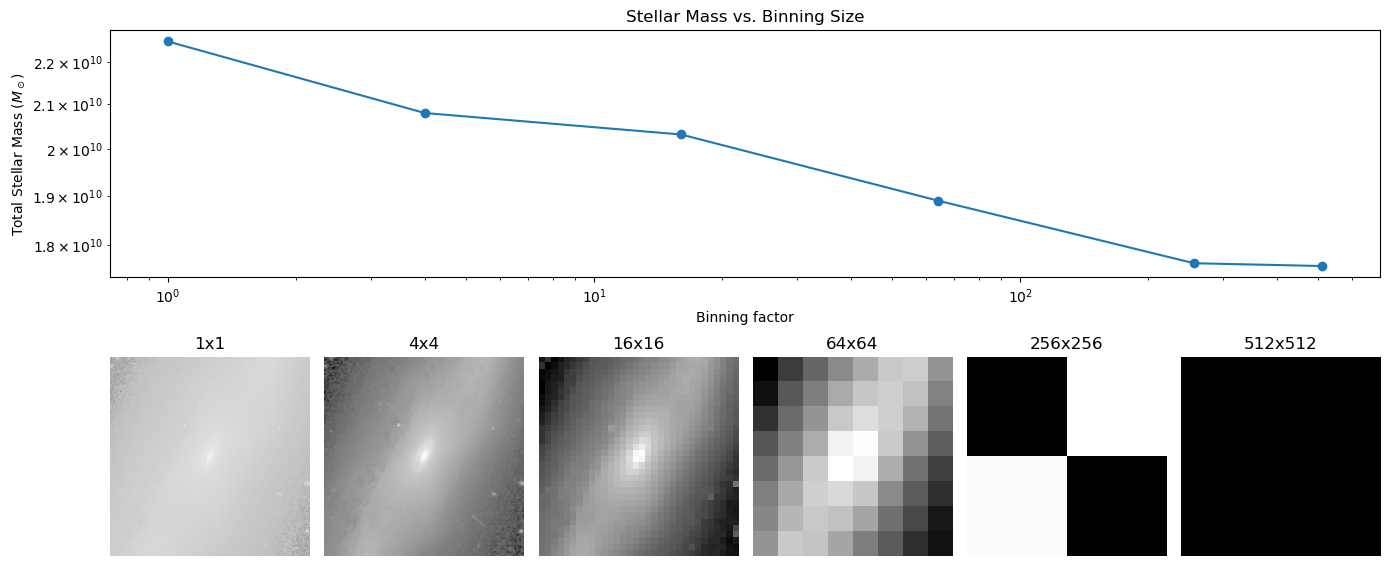

In [10]:
# We'll store bin_factors, total_mass, and the map for each binning
bin_factors = [1, 4, 16, 64, 256, 512]
mass_values = []
mass_maps = []

for bf in bin_factors:
    # Sum fluxes in each bin for g- and i-band
    g_bin = bin_image(g_band, bf)
    i_bin = bin_image(i_band, bf)

    g_bin_m = np.full_like(g_bin, np.nan)
    i_bin_m = np.full_like(i_bin, np.nan)

    g_mask = g_bin > 0
    i_mask = i_bin > 0

    g_bin_m[g_mask] = 22.5 - 2.5 * np.log10(g_bin[g_mask])
    i_bin_m[i_mask] = 22.5 - 2.5 * np.log10(i_bin[i_mask])

    # Compute M_i, g-i, and stellar mass
    M_i_binned = i_bin_m - DM
    g_minus_i_binned = g_bin_m - i_bin_m
    log_mstar_binned = np.full_like(i_bin_m, np.nan)
    valid_bins = g_mask & i_mask

    log_mstar_binned[valid_bins] = (
        1.15 + 0.7 * g_minus_i_binned[valid_bins] - 0.4 * M_i_binned[valid_bins]
    )

    total_mass = np.nansum(10**log_mstar_binned[valid_bins])
    mass_values.append(total_mass)

    # Store map for visualization (up-sample to original size if needed)
    mass_maps.append(log_mstar_binned)

# Plot results
fig = plt.figure(figsize=(14, 6))

# Top panel: line plot of bin_factor vs total mass
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(bin_factors, mass_values, marker='o')
ax1.set_xscale("log")
ax1.set_yscale('log')
ax1.set_xlabel("Binning factor")
ax1.set_ylabel(r"Total Stellar Mass ($M_\odot$)")
ax1.set_title("Stellar Mass vs. Binning Size")

# Bottom panel: show 5 subplots horizontally (one for each binned map)
for idx, bf in enumerate(bin_factors):
    ax = fig.add_subplot(2, len(bin_factors), len(bin_factors) + idx + 1)
    im = ax.imshow(mass_maps[idx], origin='lower', cmap='Grays_r')
    ax.set_title(f"{bf}x{bf}")
    ax.axis('off')

plt.tight_layout()
plt.show()